# Linear Regression 1

In [4]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/INFY.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,7.75125,7.92500,7.75000,7.83000,6.154813,12720800
1,2011-06-06,7.83375,8.08625,7.80875,7.89250,6.203941,63876800
2,2011-06-13,7.97625,8.02250,7.65250,7.70375,6.055573,58132000
3,2011-06-20,7.58250,7.94750,7.53750,7.79500,6.127301,47992800
4,2011-06-27,7.87375,8.26750,7.86375,8.25875,6.491834,40237600


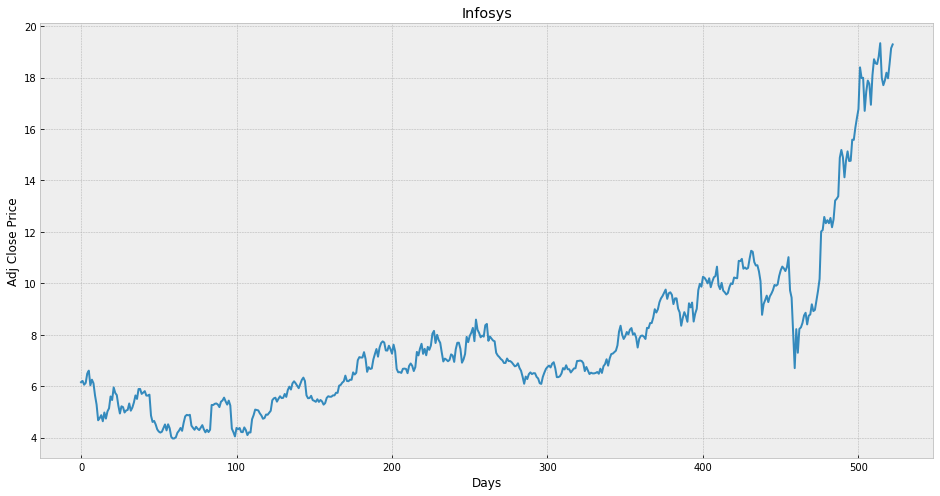

In [5]:
#Plot of Adj Close Price
plt.figure(figsize=(16,8))
plt.title('Infosys')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [6]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,6.154813
1,6.203941
2,6.055573
3,6.127301
4,6.491834


In [7]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)


In [8]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [9]:
lr = LinearRegression().fit(x_train, y_train)


In [10]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [11]:
lr_prediction = lr.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


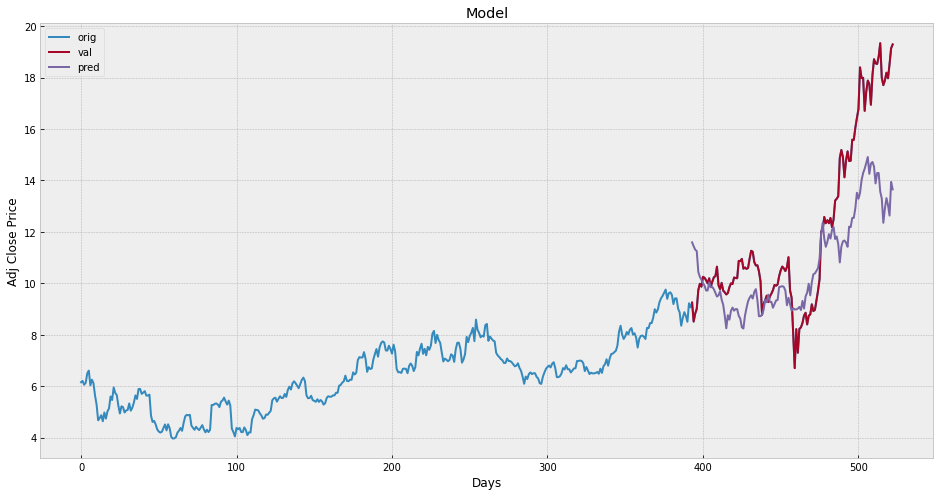

In [12]:
predictions = lr_prediction 

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orignal', 'validation', 'prediction'])

In [13]:
r2 = r2_score(z, lr_prediction)
print("r2 score = %0.3f" % r2_score(z, lr_prediction))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, lr_prediction)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - lr_prediction)/z))*100))

r2 score = 0.530
RMSE = 2.316
MAPE = 13.202


# Linear Regression 2

In [14]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/HDB.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,16.174000,16.271999,15.993000,16.080,15.120376,1779000
1,2011-06-06,16.236000,16.652000,16.150000,16.378,15.507779,11347000
2,2011-06-13,16.399000,16.541000,15.850000,15.869,15.025826,9548000
3,2011-06-20,15.654000,16.497999,15.500000,16.382,15.511568,11855000
4,2011-06-27,16.410999,17.778000,16.410999,17.587,16.652542,10384000


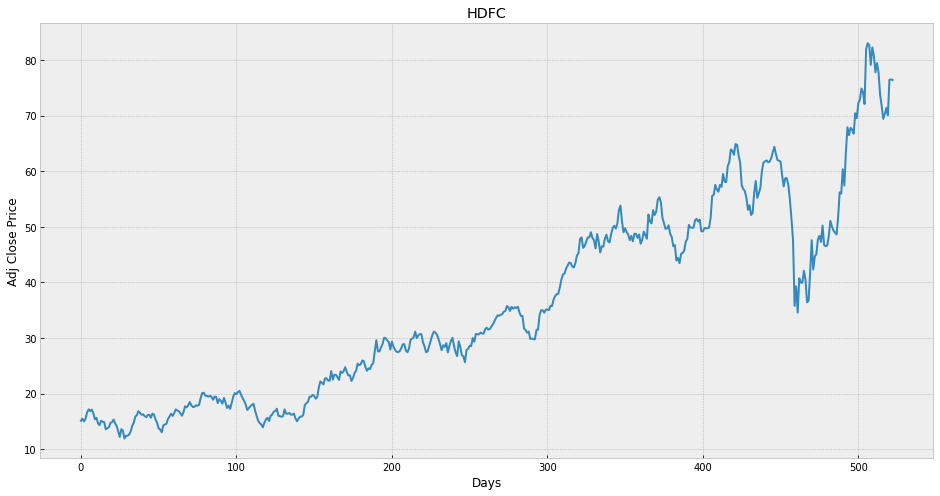

In [15]:
plt.figure(figsize=(16,8))
plt.title('HDFC')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [16]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,15.120376
1,15.507779
2,15.025826
3,15.511568
4,16.652542


In [17]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)


In [18]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [19]:
lr = LinearRegression().fit(x_train, y_train)


In [20]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [21]:
lr_prediction = lr.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


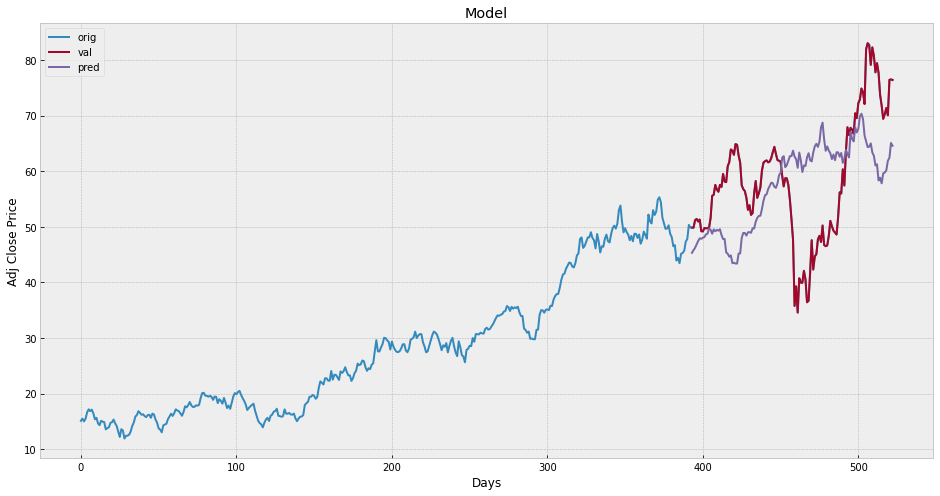

In [22]:
predictions = lr_prediction 

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [23]:
r2 = r2_score(z, lr_prediction)
print("r2 score = %0.3f" % r2_score(z, lr_prediction))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, lr_prediction)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - lr_prediction)/z))*100))

r2 score = -0.278
RMSE = 12.619
MAPE = 19.492


# Linear Regression 3

In [34]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/AXS.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,32.130001,32.970001,32.090000,32.759998,25.214233,1041900
1,2011-06-06,32.610001,32.660000,31.360001,31.590000,24.313719,4394200
2,2011-06-13,31.510000,31.780001,30.530001,30.540001,23.505579,4055800
3,2011-06-20,30.490000,31.209999,30.230000,30.730000,23.651815,5054100
4,2011-06-27,30.820000,31.459999,30.660000,31.129999,23.959679,5406100


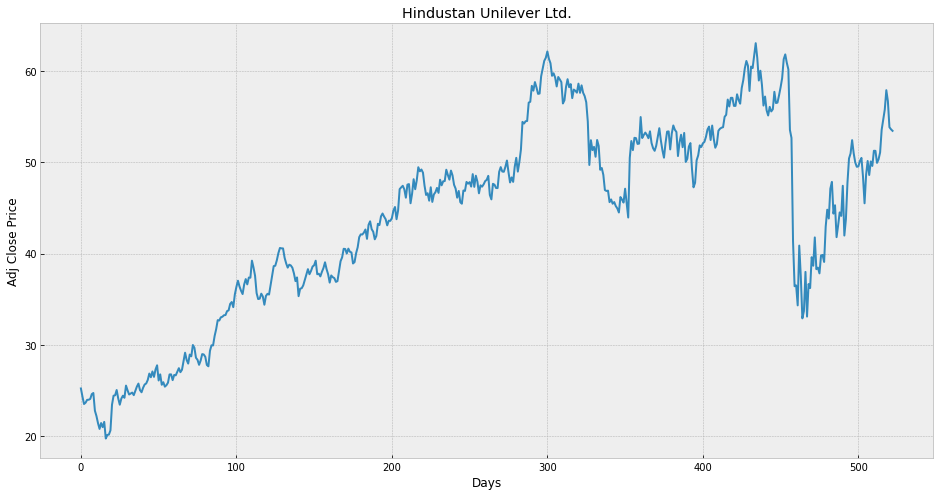

In [35]:
plt.figure(figsize=(16,8))
plt.title('Axis')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [36]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,25.214233
1,24.313719
2,23.505579
3,23.651815
4,23.959679


In [37]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)


In [38]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [39]:
lr = LinearRegression().fit(x_train, y_train)


In [40]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [41]:
lr_prediction = lr.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


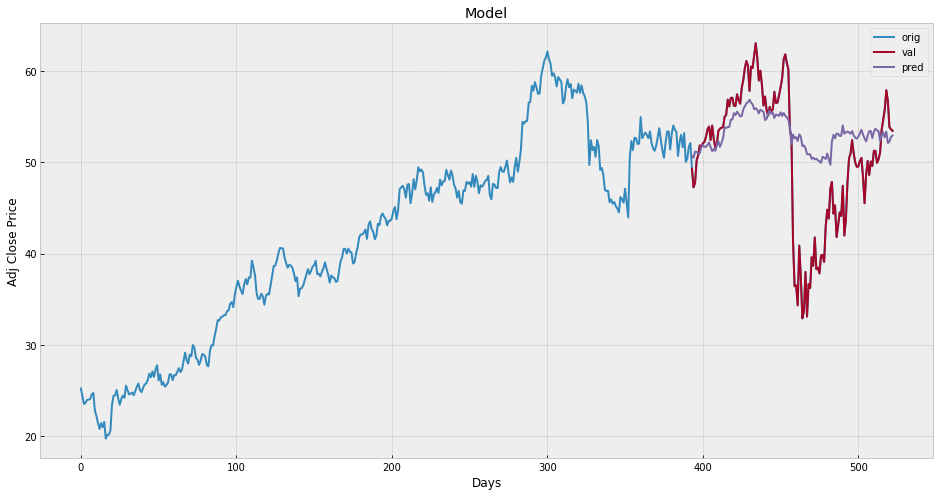

In [42]:
predictions = lr_prediction 

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [43]:
r2 = r2_score(z, lr_prediction)
print("r2 score = %0.3f" % r2_score(z, lr_prediction))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, lr_prediction)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - lr_prediction)/z))*100))

r2 score = 0.180
RMSE = 6.739
MAPE = 11.189


# Lasso Regression 1




In [44]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/INFY.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,7.75125,7.92500,7.75000,7.83000,6.154813,12720800
1,2011-06-06,7.83375,8.08625,7.80875,7.89250,6.203941,63876800
2,2011-06-13,7.97625,8.02250,7.65250,7.70375,6.055573,58132000
3,2011-06-20,7.58250,7.94750,7.53750,7.79500,6.127301,47992800
4,2011-06-27,7.87375,8.26750,7.86375,8.25875,6.491834,40237600


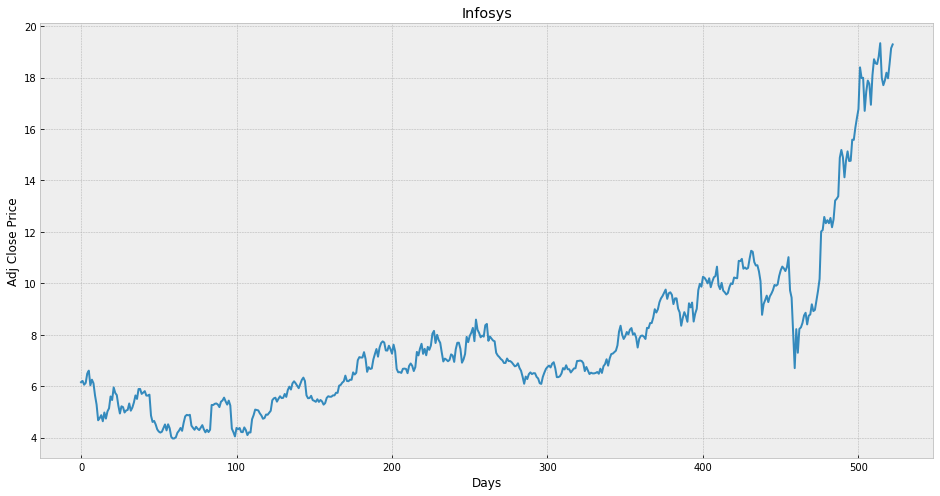

In [45]:
plt.figure(figsize=(16,8))
plt.title('Infosys')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [46]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,6.154813
1,6.203941
2,6.055573
3,6.127301
4,6.491834


In [47]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)

In [48]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [49]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [51]:
y_pred_lasso = reg.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


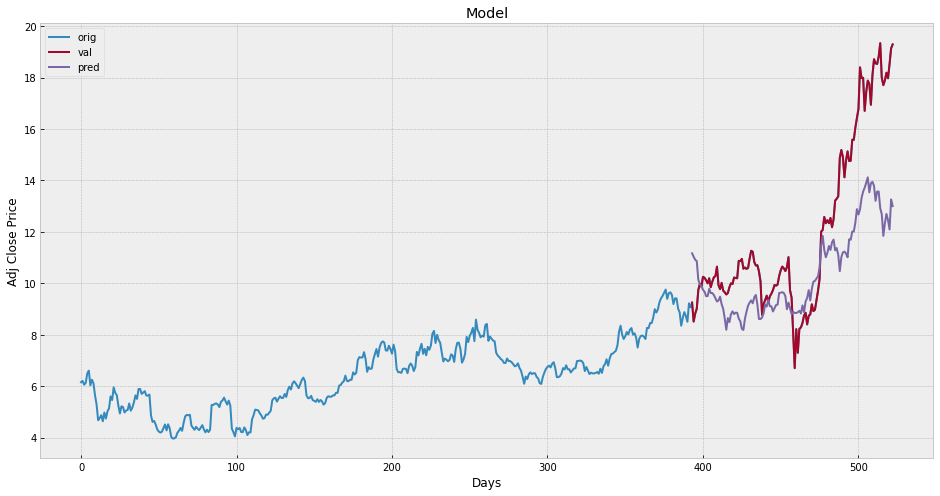

In [52]:
predictions = y_pred_lasso

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [53]:
print("r2 score = %0.3f" % r2_score(z, y_pred_lasso))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, y_pred_lasso)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - y_pred_lasso)/z))*100))

r2 score = 0.402
RMSE = 2.613
MAPE = 14.614


# Lasso Regression 2




In [54]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/HDB.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,16.174000,16.271999,15.993000,16.080,15.120376,1779000
1,2011-06-06,16.236000,16.652000,16.150000,16.378,15.507779,11347000
2,2011-06-13,16.399000,16.541000,15.850000,15.869,15.025826,9548000
3,2011-06-20,15.654000,16.497999,15.500000,16.382,15.511568,11855000
4,2011-06-27,16.410999,17.778000,16.410999,17.587,16.652542,10384000


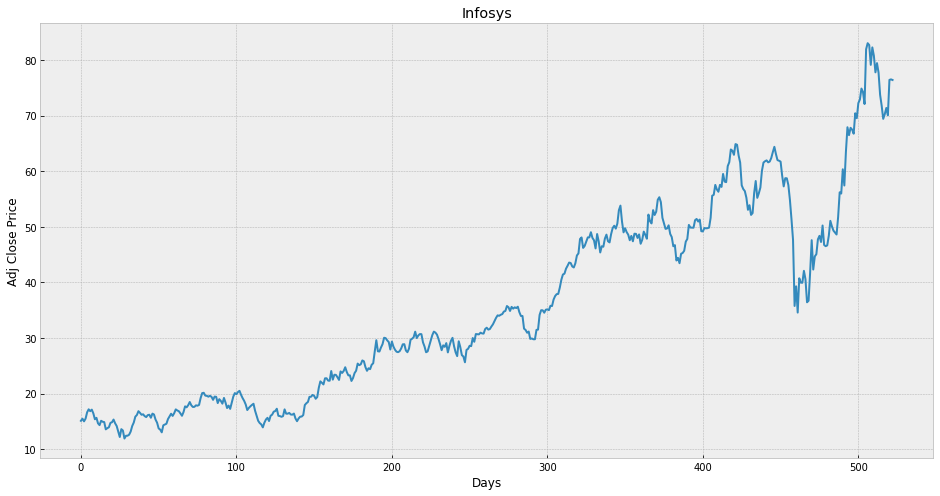

In [55]:
plt.figure(figsize=(16,8))
plt.title('HDFC')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [56]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,15.120376
1,15.507779
2,15.025826
3,15.511568
4,16.652542


In [57]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)

In [58]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [59]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [61]:
y_pred_lasso = reg.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


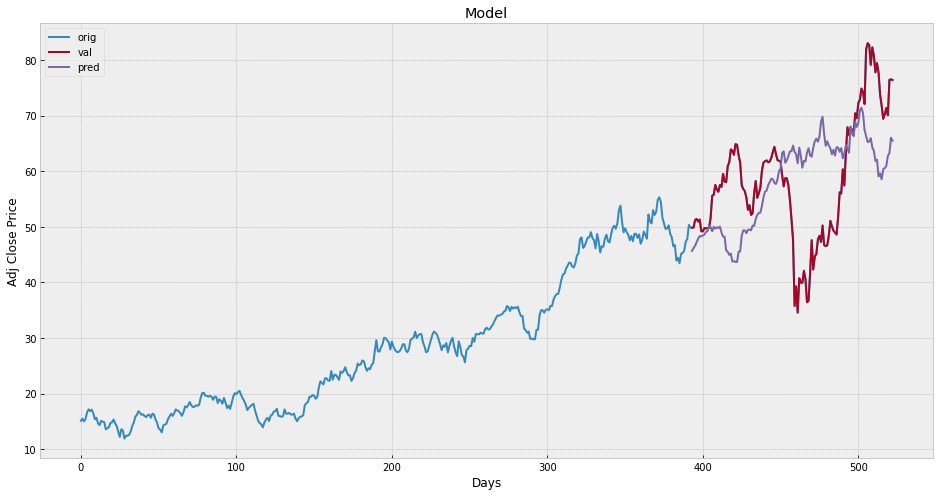

In [62]:
predictions = y_pred_lasso

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [63]:
print("r2 score = %0.3f" % r2_score(z, y_pred_lasso))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, y_pred_lasso)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - y_pred_lasso)/z))*100))

r2 score = -0.294
RMSE = 12.700
MAPE = 19.450


# Lasso Regression 3




In [84]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/AXS.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,32.130001,32.970001,32.090000,32.759998,25.214233,1041900
1,2011-06-06,32.610001,32.660000,31.360001,31.590000,24.313719,4394200
2,2011-06-13,31.510000,31.780001,30.530001,30.540001,23.505579,4055800
3,2011-06-20,30.490000,31.209999,30.230000,30.730000,23.651815,5054100
4,2011-06-27,30.820000,31.459999,30.660000,31.129999,23.959679,5406100


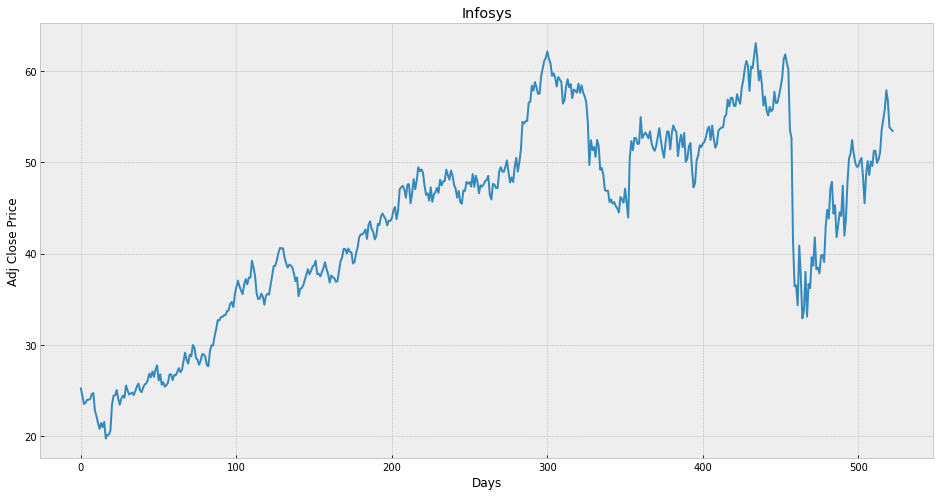

In [85]:
plt.figure(figsize=(16,8))
plt.title('Axis')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [86]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,25.214233
1,24.313719
2,23.505579
3,23.651815
4,23.959679


In [87]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)

In [88]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z1 = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [89]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [91]:
y_pred_lasso = reg.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


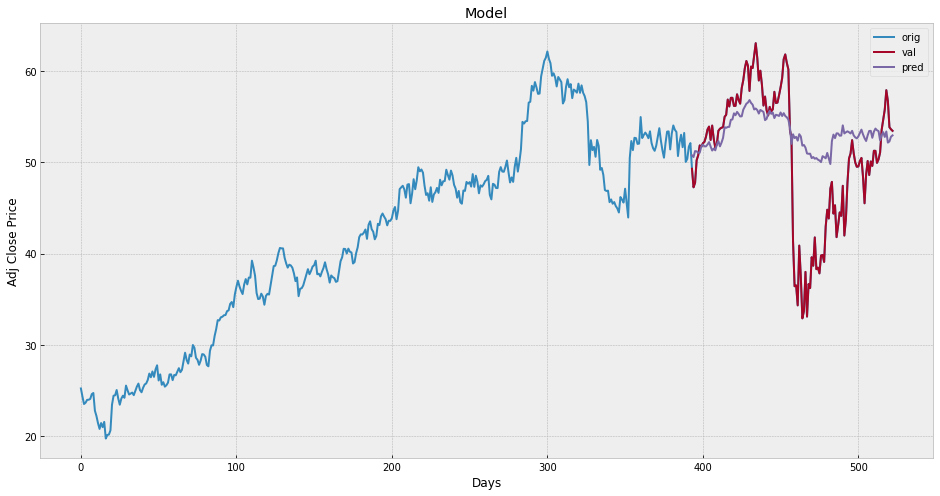

In [92]:
predictions = y_pred_lasso

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [93]:
print("r2 score = %0.3f" % r2_score(z1, y_pred_lasso))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z1, y_pred_lasso)))
print("MAPE = %0.3f" % (np.mean(np.abs((z1 - y_pred_lasso)/z1))*100))

r2 score = 0.174
RMSE = 6.764
MAPE = 11.231


# Elastic Net Regression 1


In [225]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/INFY.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,7.75125,7.92500,7.75000,7.83000,6.154813,12720800
1,2011-06-06,7.83375,8.08625,7.80875,7.89250,6.203941,63876800
2,2011-06-13,7.97625,8.02250,7.65250,7.70375,6.055573,58132000
3,2011-06-20,7.58250,7.94750,7.53750,7.79500,6.127301,47992800
4,2011-06-27,7.87375,8.26750,7.86375,8.25875,6.491834,40237600


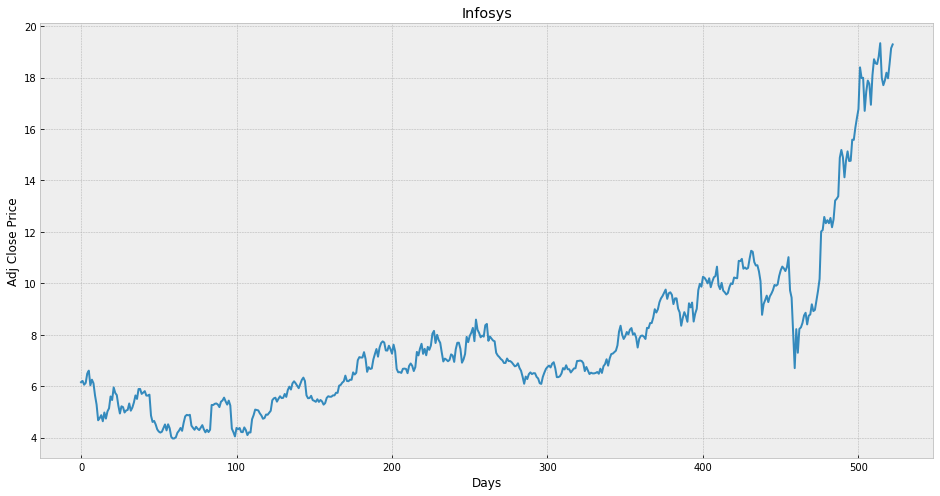

In [226]:
plt.figure(figsize=(16,8))
plt.title('Infosys')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [227]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,6.154813
1,6.203941
2,6.055573
3,6.127301
4,6.491834


In [228]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)

In [229]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [230]:
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [231]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [232]:
y_pred_elastic = e_net.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


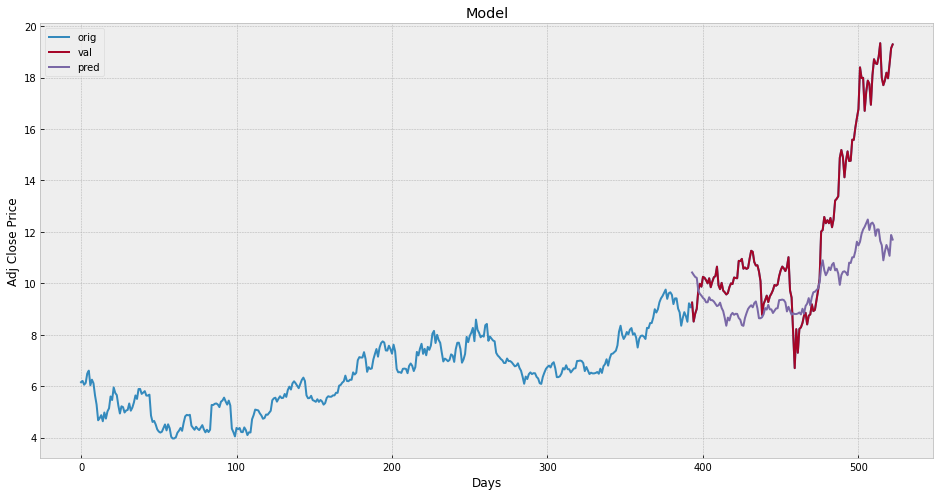

In [233]:
predictions = y_pred_elastic

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [234]:
print("r2 score = %0.3f" % r2_score(z, y_pred_elastic))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, y_pred_elastic)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - y_pred_elastic)/z))*100))

r2 score = 0.095
RMSE = 3.214
MAPE = 17.033


# Elastic Net Regression 2


In [114]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/HDB.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,16.174000,16.271999,15.993000,16.080,15.120376,1779000
1,2011-06-06,16.236000,16.652000,16.150000,16.378,15.507779,11347000
2,2011-06-13,16.399000,16.541000,15.850000,15.869,15.025826,9548000
3,2011-06-20,15.654000,16.497999,15.500000,16.382,15.511568,11855000
4,2011-06-27,16.410999,17.778000,16.410999,17.587,16.652542,10384000


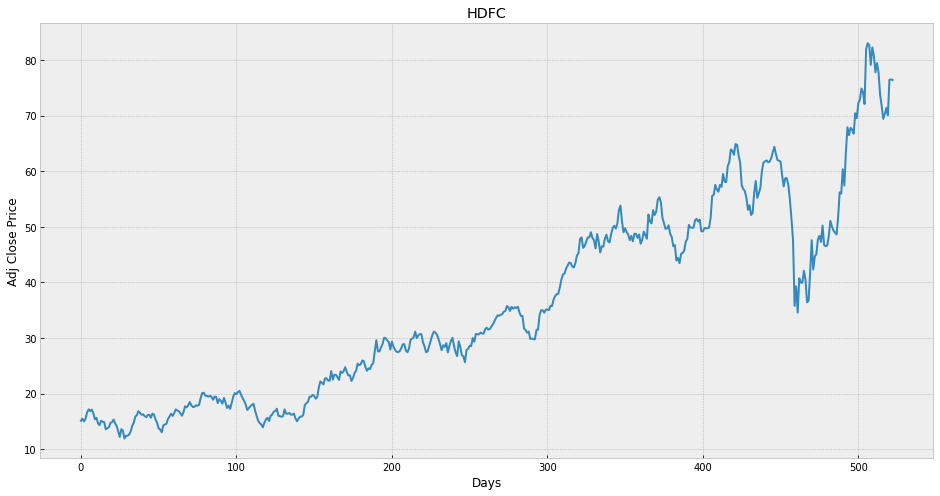

In [115]:
plt.figure(figsize=(16,8))
plt.title('HDFC')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [116]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,15.120376
1,15.507779
2,15.025826
3,15.511568
4,16.652542


In [117]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)

In [118]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [119]:
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [121]:
y_pred_elastic = e_net.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


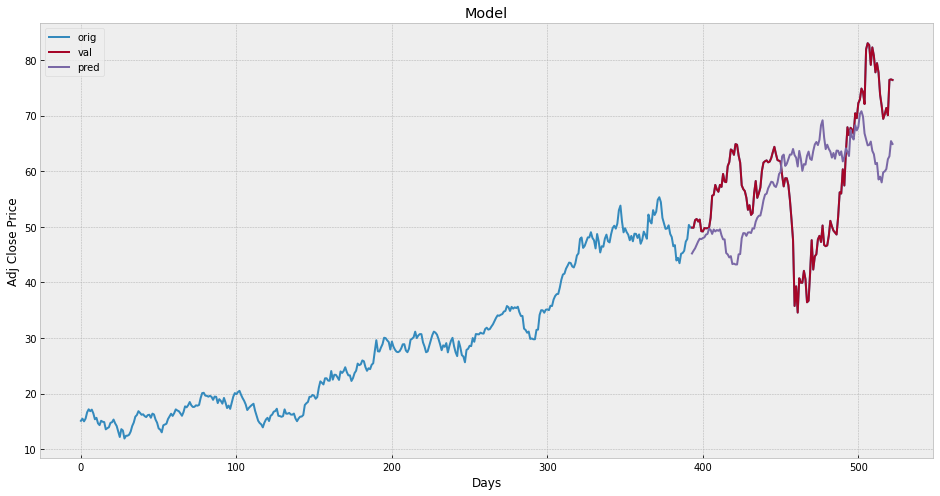

In [122]:
predictions = y_pred_elastic

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [123]:
print("r2 score = %0.3f" % r2_score(z, y_pred_elastic))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, y_pred_elastic)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - y_pred_elastic)/z))*100))

r2 score = -0.293
RMSE = 12.693
MAPE = 19.607


# Elastic Net Regression 3


In [135]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/AXS.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,32.130001,32.970001,32.090000,32.759998,25.214233,1041900
1,2011-06-06,32.610001,32.660000,31.360001,31.590000,24.313719,4394200
2,2011-06-13,31.510000,31.780001,30.530001,30.540001,23.505579,4055800
3,2011-06-20,30.490000,31.209999,30.230000,30.730000,23.651815,5054100
4,2011-06-27,30.820000,31.459999,30.660000,31.129999,23.959679,5406100


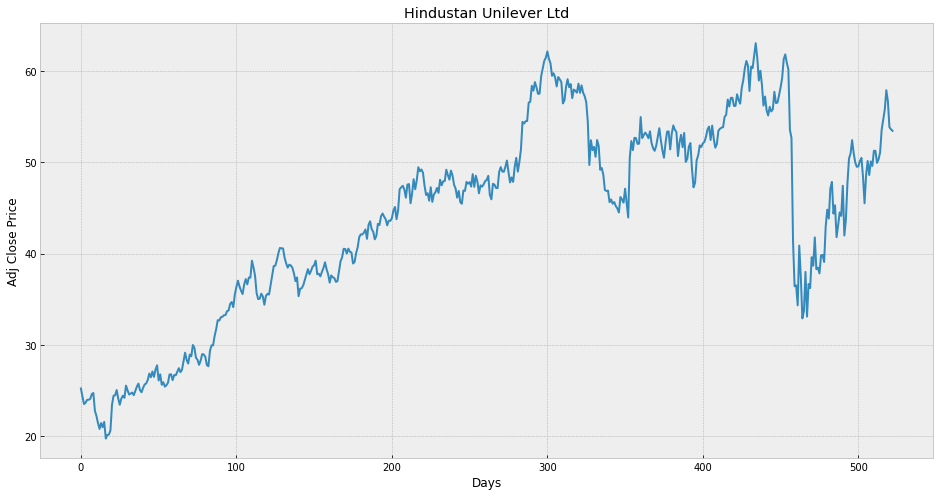

In [136]:
plt.figure(figsize=(16,8))
plt.title('Axis')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [137]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,25.214233
1,24.313719
2,23.505579
3,23.651815
4,23.959679


In [138]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)

In [139]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [140]:
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [142]:
y_pred_elastic = e_net.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


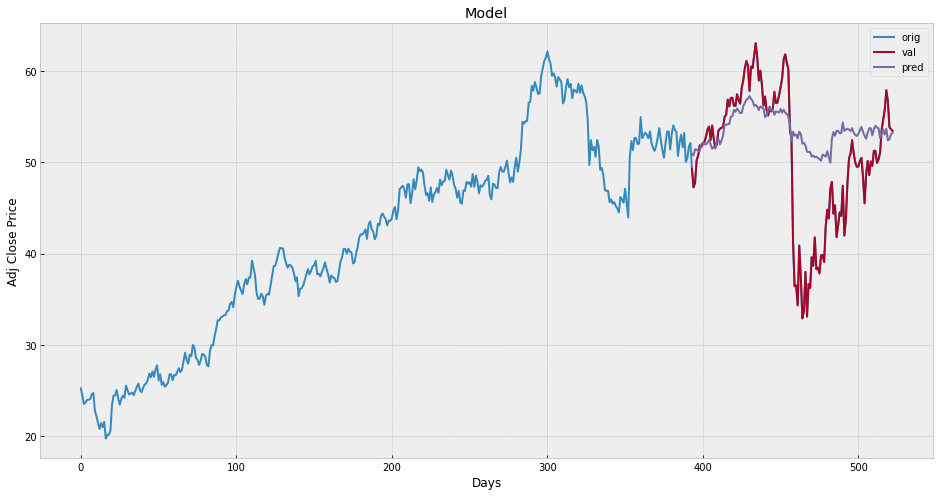

In [143]:
predictions = y_pred_elastic

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [144]:
print("r2 score = %0.3f" % r2_score(z, y_pred_elastic))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, y_pred_elastic)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - y_pred_elastic)/z))*100))

r2 score = 0.156
RMSE = 6.835
MAPE = 11.230


# Decision Tree Regression 1

In [145]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/INFY.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,7.75125,7.92500,7.75000,7.83000,6.154813,12720800
1,2011-06-06,7.83375,8.08625,7.80875,7.89250,6.203941,63876800
2,2011-06-13,7.97625,8.02250,7.65250,7.70375,6.055573,58132000
3,2011-06-20,7.58250,7.94750,7.53750,7.79500,6.127301,47992800
4,2011-06-27,7.87375,8.26750,7.86375,8.25875,6.491834,40237600


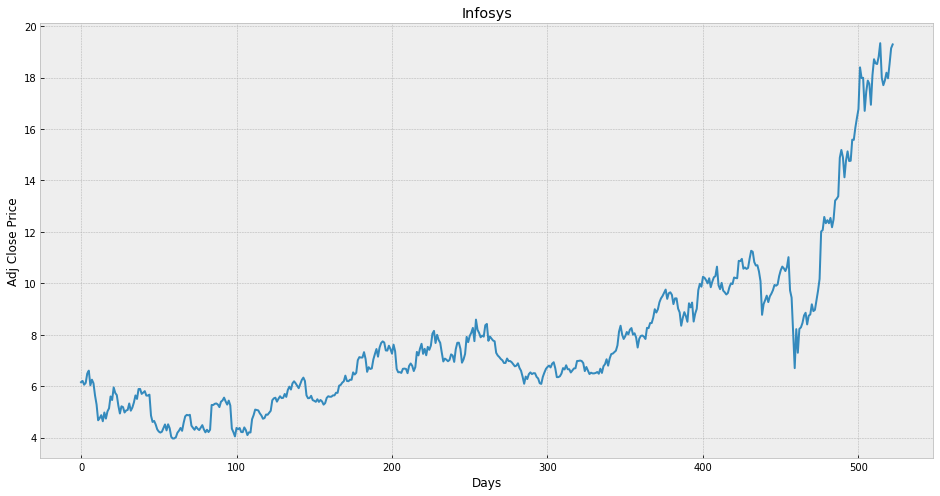

In [146]:
plt.figure(figsize=(16,8))
plt.title('Infosys')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [147]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,6.154813
1,6.203941
2,6.055573
3,6.127301
4,6.491834


In [148]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)


In [149]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [150]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [151]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [152]:
tree_prediction = tree.predict(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


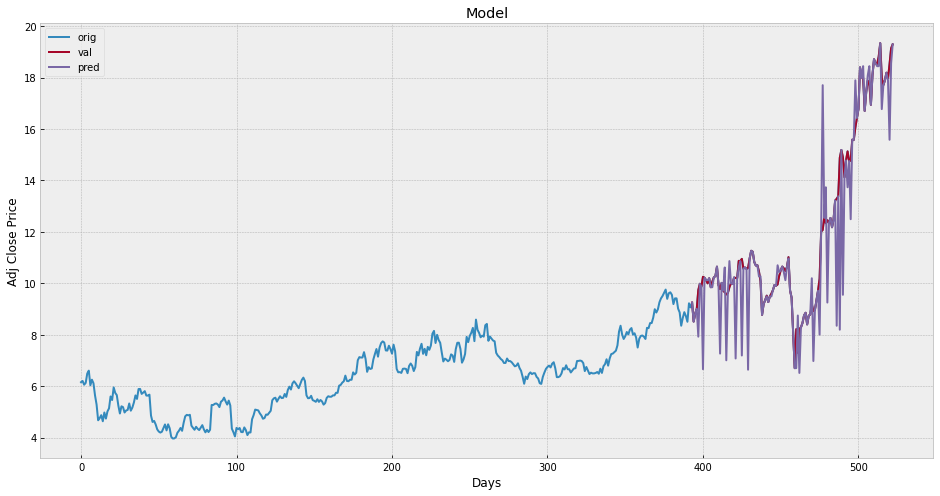

In [153]:
predictions = tree_prediction 

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [154]:
r2 = r2_score(z, tree_prediction)
print("r2 score = %0.3f" % r2_score(z, tree_prediction))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, tree_prediction)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - tree_prediction)/z))*100))

r2 score = 0.830
RMSE = 1.392
MAPE = 4.933


# Decision Tree Regression 2



In [155]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/HDB.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,16.174000,16.271999,15.993000,16.080,15.120376,1779000
1,2011-06-06,16.236000,16.652000,16.150000,16.378,15.507779,11347000
2,2011-06-13,16.399000,16.541000,15.850000,15.869,15.025826,9548000
3,2011-06-20,15.654000,16.497999,15.500000,16.382,15.511568,11855000
4,2011-06-27,16.410999,17.778000,16.410999,17.587,16.652542,10384000


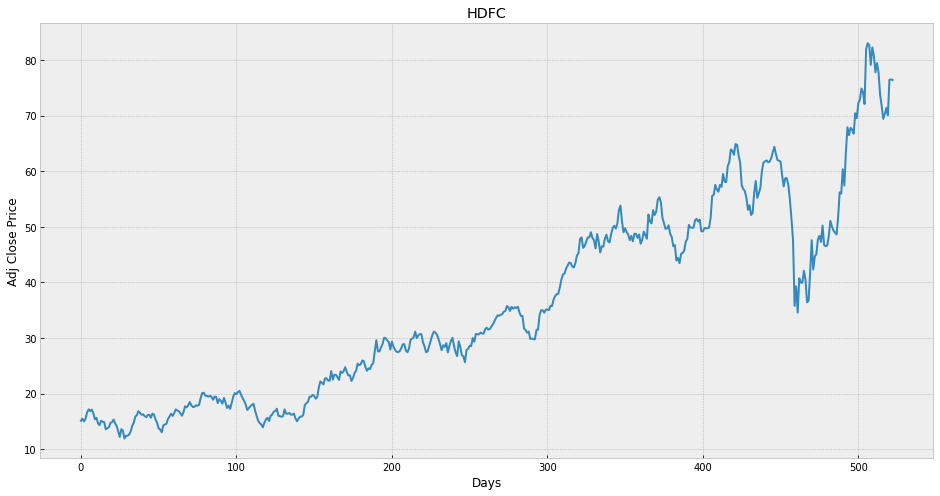

In [156]:
plt.figure(figsize=(16,8))
plt.title('HDFC')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [157]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,15.120376
1,15.507779
2,15.025826
3,15.511568
4,16.652542


In [158]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)


In [159]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [160]:
tree = DecisionTreeRegressor().fit(x_train, y_train)


In [161]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
#x_future

In [162]:
tree_prediction = tree.predict(x_future)
#print(tree_prediction)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


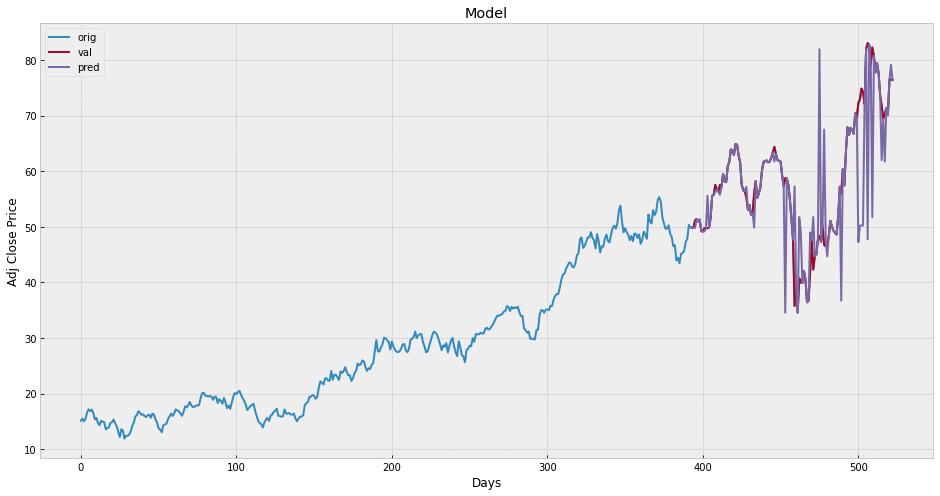

In [163]:
predictions = tree_prediction 

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [164]:
r2 = r2_score(z, tree_prediction)
print("r2 score = %0.3f" % r2_score(z, tree_prediction))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, tree_prediction)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - tree_prediction)/z))*100))

r2 score = 0.501
RMSE = 7.887
MAPE = 4.826


# Decision Tree Regression 3

In [175]:
#import packages
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('bmh')

#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/AXS.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-30,32.130001,32.970001,32.090000,32.759998,25.214233,1041900
1,2011-06-06,32.610001,32.660000,31.360001,31.590000,24.313719,4394200
2,2011-06-13,31.510000,31.780001,30.530001,30.540001,23.505579,4055800
3,2011-06-20,30.490000,31.209999,30.230000,30.730000,23.651815,5054100
4,2011-06-27,30.820000,31.459999,30.660000,31.129999,23.959679,5406100


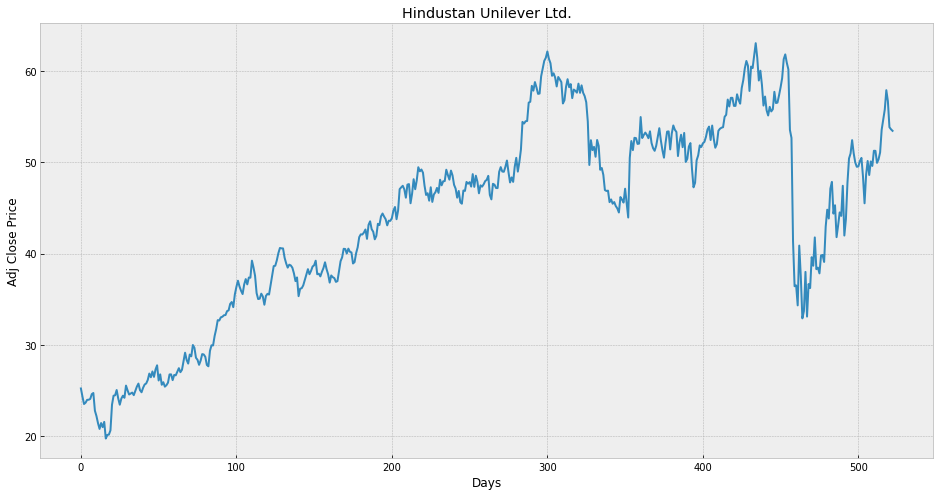

In [176]:
plt.figure(figsize=(16,8))
plt.title('Axis')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.show()

In [177]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,25.214233
1,24.313719
2,23.505579
3,23.651815
4,23.959679


In [178]:
future_days = 130
df['Prediction'] = df['Adj Close'].shift(-future_days)


In [179]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
z = np.array(df['Adj Close'])[393:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [180]:
tree = DecisionTreeRegressor().fit(x_train, y_train)


In [181]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [182]:
tree_prediction = tree.predict(x_future)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


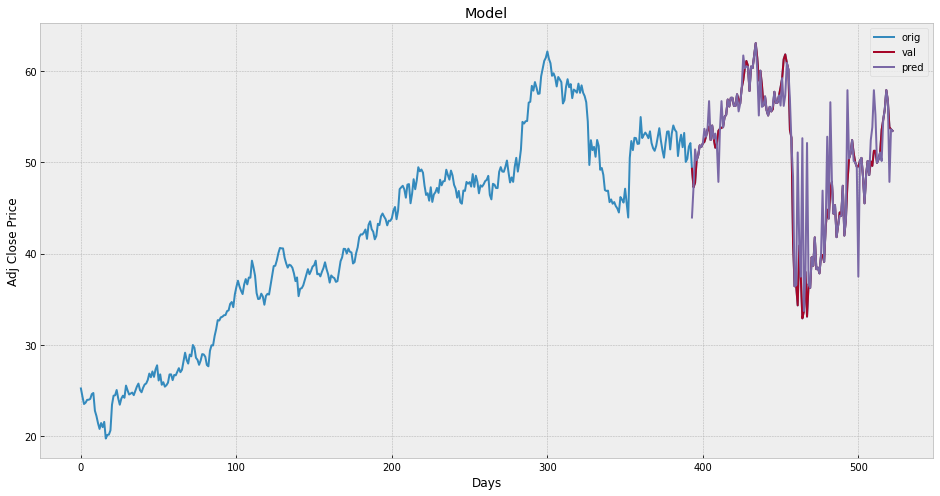

In [183]:
predictions = tree_prediction 

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['orig', 'val', 'pred'])

In [184]:
r2 = r2_score(z, tree_prediction)
print("r2 score = %0.3f" % r2_score(z, tree_prediction))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, tree_prediction)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - tree_prediction)/z))*100))

r2 score = 0.742
RMSE = 3.780
MAPE = 3.326


# LSTM 1

In [185]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
plt.style.use('bmh')
#creating dataframe
#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/INFY.csv')
data = df.sort_index(ascending=True, axis=0)

In [186]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [187]:
train = dataset[0:393,:]
valid = dataset[393:,:]

In [188]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [189]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

333/333 - 24s - loss: 0.0020


In [190]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


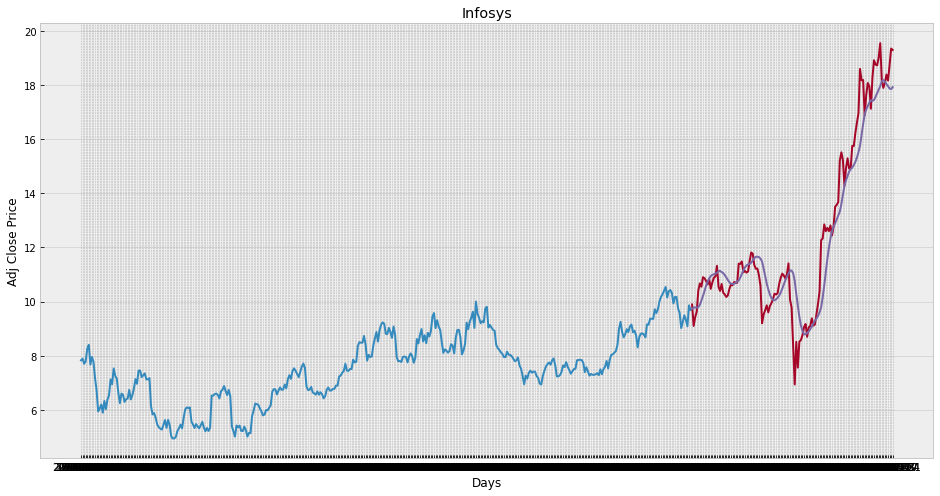

In [191]:
#for plotting
train = new_data[:393]
valid = new_data[393:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.title('Infosys')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [192]:
print("r2 score = %0.3f" % r2_score(z, closing_price))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, closing_price)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - closing_price)/z))*100))

r2 score = -26.832
RMSE = 39.253
MAPE = 75.340


# LSTM 2

In [193]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
plt.style.use('bmh')
#creating dataframe
#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/HDB.csv')
data = df.sort_index(ascending=True, axis=0)

In [194]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [195]:
train = dataset[0:393,:]
valid = dataset[393:,:]

In [196]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [197]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

333/333 - 9s - loss: 0.0032


In [198]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


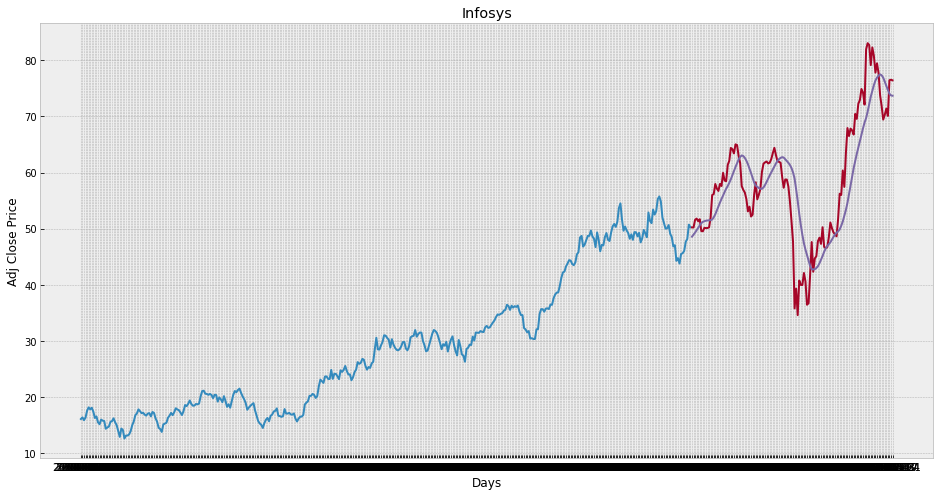

In [199]:
#for plotting
train = new_data[:393]
valid = new_data[393:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.title('HDFC')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [200]:
print("r2 score = %0.3f" % r2_score(z, closing_price))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, closing_price)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - closing_price)/z))*100))

r2 score = -1.168
RMSE = 10.956
MAPE = 23.349


# LSTM 3

In [217]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
plt.style.use('bmh')
#creating dataframe
#read the file
df = pd.read_csv('/content/drive/MyDrive/Project/AXS.csv')
data = df.sort_index(ascending=True, axis=0)

In [218]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
z = np.array(df['Adj Close'])[393:]

In [219]:
train = dataset[0:393,:]
valid = dataset[393:,:]

In [220]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [221]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

333/333 - 9s - loss: 0.0088


In [222]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


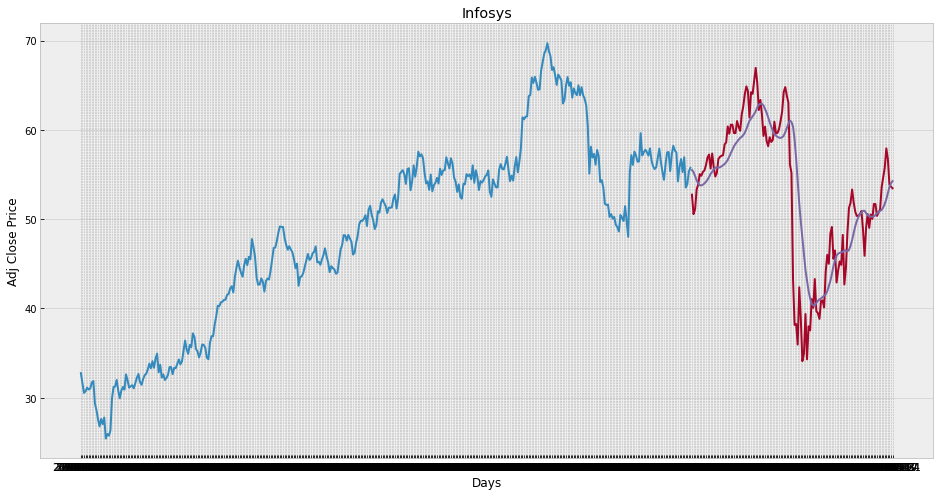

In [223]:
#for plotting
train = new_data[:393]
valid = new_data[393:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.title('Axis')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [224]:
print("r2 score = %0.3f" % r2_score(z, closing_price))
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(z, closing_price)))
print("MAPE = %0.3f" % (np.mean(np.abs((z - closing_price)/z))*100))

r2 score = 0.505
RMSE = 5.235
MAPE = 17.559
